In [4]:
import pandas as pd
import numpy as np

data_train = pd.read_csv("titanic/train.csv")
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


•PassengerID（ID）  
•Survived(存活与否)  
•Pclass（客舱等级，较为重要）  
•Name（姓名，可提取出更多信息）  
•Sex（性别，较为重要）  
•Age（年龄，较为重要）  
•Parch（直系亲友）  
•SibSp（旁系）  
•Ticket（票编号）   
•Fare（票价）  
•Cabin（客舱编号）  
•Embarked（上船的港口编号）  

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


训练集一共891条数据，其中Age、Cabin、Embarked字段存在空值

In [9]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

也能看出Age、Cabin、Embarked字段有多少个字段为空

In [10]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


查看数据的算每一列的若干常用统计值  
是描述数字类型的属性，而include= “O“ 则是描述object类型的熟悉， include= ”all“则是对所有属性的描述。

**可以看出0.383838的人最后获救了，2、3等舱的人比1等舱的人多**

# 初步数据分析
每个/多个 属性和最后的Survived之间有着什么样的关系呢。

## 乘客各属性分布


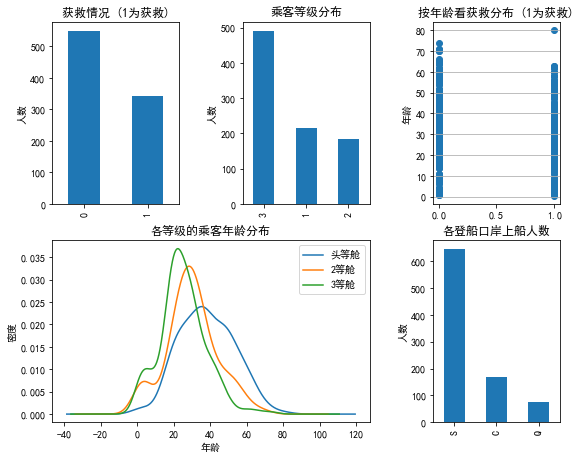

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
fig.set(alpha=0.2) # 设定图表颜色alpha

plt.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体
plt.rcParams['axes.unicode_minus'] = False #解决中文显示为方框的问题

# 子图
plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind='bar') #柱状图
plt.title("获救情况 (1为获救)") #标题
plt.ylabel("人数")

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.ylabel("人数")
plt.title("乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived,data_train.Age) #散点图
plt.ylabel("年龄")
plt.grid(b=True,which='major',axis='y') #显示y轴网格
plt.title("按年龄看获救分布 (1为获救)")

plt.subplot2grid((2,3),(1,0),colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("年龄")
plt.ylabel("密度")
plt.title("各等级的乘客年龄分布")
plt.legend(('头等舱','2等舱','3等舱'),loc='best')  #显示图例

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title("各登船口岸上船人数")
plt.ylabel("人数")

plt.subplots_adjust(left=0.125,
                    bottom=-0.51,
                    right=1.3,
                    top=0.88,
                    wspace=0.5,
                    hspace=0.2
                   )

plt.show()


## 属性与获救结果的关联统计
### 查看各乘客等级的获救情况

<Figure size 432x288 with 0 Axes>

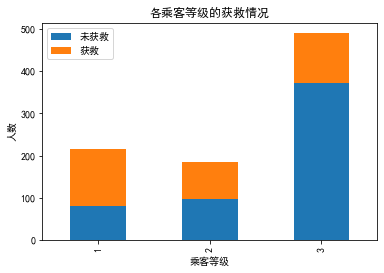

In [51]:
fig = plt.figure()
fig.set(alpha=0.2)

survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()

df = pd.DataFrame({"未获救":survived_0, "获救":survived_1})
df.plot(kind='bar',stacked=True) #stacked表示叠加
plt.title('各乘客等级的获救情况')
plt.xlabel('乘客等级')
plt.ylabel('人数')
plt.show()

明显等级为1的乘客，获救的概率高很多。这一定是影响救结果的一个特征  

### 查看性别的获救情况

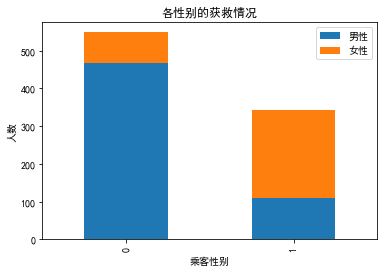

In [53]:
survived_m = data_train.Survived[data_train.Sex == "male"].value_counts()
survived_f = data_train.Survived[data_train.Sex == "female"].value_counts()

df = pd.DataFrame({"男性":survived_m, "女性":survived_f})
df.plot(kind='bar',stacked=True) #stacked表示叠加
plt.title('各性别的获救情况')
plt.xlabel('乘客性别')
plt.ylabel('人数')
plt.show()

lady first性别也是重要特征

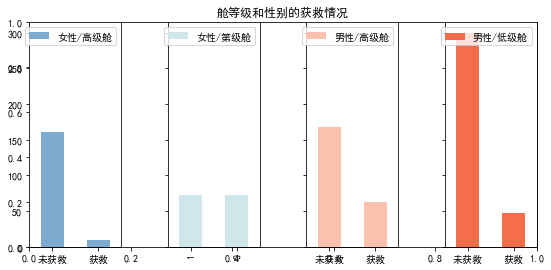

In [76]:
#然后来看看各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65)
plt.title('舱等级和性别的获救情况')

ax1 = fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar',label='female high class',color='#7DABD0')
ax1.set_xticklabels(["未获救","获救"],rotation=0)
plt.legend(["女性/高级舱"],loc='best')

ax2 = fig.add_subplot(142,sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar',label='female low class',color='#CFE7EA')
ax1.set_xticklabels(["未获救","获救"],rotation=0)
plt.legend(["女性/第级舱"],loc='best')

ax3=fig.add_subplot(143,sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar',label='male high class',color='#FBC1AD')
ax3.set_xticklabels(["未获救","获救"],rotation=0)
plt.legend(["男性/高级舱"],loc="best")

ax4=fig.add_subplot(144,sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar',label='male low class',color='#F56E4A')
ax4.set_xticklabels(["未获救","获救"],rotation=0)
plt.legend(["男性/低级舱"],loc="best")
plt.subplots_adjust(left=0.125,
                    bottom=0.1,
                    right=1.3,
                    top=0.88,
                    wspace=0.5,
                    hspace=0.2
                   )



### 查看各登船港口的获救情况

<Figure size 432x288 with 0 Axes>

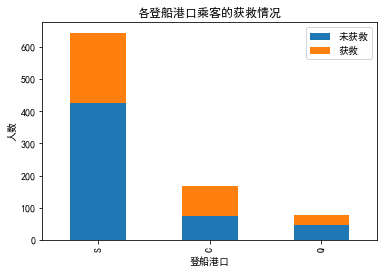

In [77]:
fig = plt.figure()
fig.set(alpha=0.2) 

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({"未获救":Survived_0,"获救":Survived_1})
df.plot(kind='bar',stacked=True)
plt.title("各登船港口乘客的获救情况")
plt.xlabel("登船港口")
plt.ylabel("人数")

plt.show()

### 看堂兄弟/妹，孩子/父母有几人，对是否获救的影响

In [78]:
gg = data_train.groupby(['SibSp','Survived'])['PassengerId'].count()
print(gg)

gp = data_train.groupby(['Parch','Survived'])['PassengerId'].count()
print(gp)


SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64
Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: PassengerId, dtype: int64


### ticket cabin的分析
ticket是船票编号,应该是unique的，和最后的结果没有太大的关系，先不纳入考虑的特征范畴
cabin只有204个乘客有值，我们先看一下它的一个分布

In [79]:
data_train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

<Figure size 432x288 with 0 Axes>

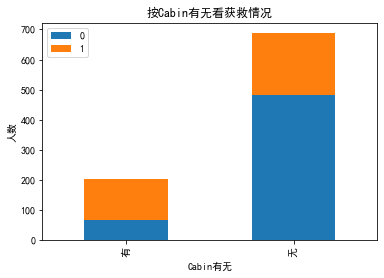

In [81]:
fig = plt.figure()
fig.set(alpha=0.2) #设定图标颜色alpha参数

Survived_cabin = data_train.Survived[data_train.Cabin.notnull()].value_counts()
Survived_nocabin = data_train.Survived[data_train.Cabin.isnull()].value_counts()
df=pd.DataFrame({"有":Survived_cabin,"无":Survived_nocabin}).transpose()
df.plot(kind='bar',stacked=True)
plt.title("按Cabin有无看获救情况")
plt.xlabel("Cabin有无")
plt.ylabel("人数")
plt.show()

有Cabin记录的似乎获救概率稍高一些，先这么放着吧

## 简单数据预处理

通常遇到缺失值的情况，会有几种常见的处理方式

* 如果缺失的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noice，影响最后的结果了。
* 如果缺失的样本适中，而该属性非连续值特征属性(比如类目属性)，那就把NaN作为一个新类别，加到类别特征中
* 如果缺失值样本适中，而该属性为连续值特征属性，会开率给定一个step(比如这里的age,可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中。
* 有些情况下，缺失值的个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上。


本例中，后两种处理方式应该都是可行的，先试试拟合补全吧(虽然说没有特别多的背景可供我们拟合，这不一定是一个多么好的选择)

我们这里使用scikit-learn种的RandomForest来拟合一下缺失的年龄数据(注：RandomForest是一个用在原始数据中做不同采样， 
建立多颗DesionTree，再进行average等等来降低过拟合现象，提高结果的机器学习算法)

In [82]:
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    
    #乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()]
    unknown_age = age_df[age_df.Age.isnull()]
    
    #y即目标年龄
    y = known_age.iloc[:,0]
    
    #x即特征属性
    X = known_age.iloc[:,1:]
    
    #fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(X,y)
    
    #用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age.iloc[:,1::])
    
    #用得到的预测结果填补原缺失数据
    df.loc[(df.Age.isnull()),'Age'] = predictedAges
    return df,rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()),'Cabin'] = 'No'
    return df

data_train,rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)


In [84]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


因为逻辑回归建模时，需要输入的特征 都是数值型特征，通常会先对类目型的特征因子化。什么叫因子化呢？举个例子：

以Cabin为例。原本一个属性维度，因为其取值可以是[‘yes’,‘no’],而将其平展开为’Cabin_yes’,'Cabin_no’两个属性

* 原本Cabin取值为yes的，在此处的"Cabin_yes"下取值为1，在"Cabin_no"下取值为0
* 原本Cabin取值为no的，在此处的"Cabin_yes"下取值为0，在"Cabin_no"下取值为1
我们使用pandas的"get_dummies"来完成这个工作，并拼接在原来的"data_train"之上，如下所示

In [85]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'],prefix='Cabin')
dummies_Embarked  = pd.get_dummies(data_train['Embarked'],prefix='Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'],prefix='Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'],prefix='Pclass')
df = pd.concat([data_train,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis=1)
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True) #inplace=True：不创建新的对象，直接对原始对象进行修改
df.columns

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_No',
       'Cabin_Yes', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Cabin_No     891 non-null    uint8  
 7   Cabin_Yes    891 non-null    uint8  
 8   Embarked_C   891 non-null    uint8  
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
 11  Sex_female   891 non-null    uint8  
 12  Sex_male     891 non-null    uint8  
 13  Pclass_1     891 non-null    uint8  
 14  Pclass_2     891 non-null    uint8  
 15  Pclass_3     891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(10)
memory usage: 50.6 KB


成功的把类目属性全部转化成0，1的属性值了。   
这样，看起来，需要的属性值都有值，且都是数值类型的。  
但是仔细已经按Age和Fare两个属性，乘客的数值幅度变化太大，如果了解逻辑回归与梯度下降的话，会知道，各属性之间scale差距太大，将对收敛速  度造成几万点伤害，设置不收敛…所以先用scikit-learn里面的preprocessing模块对这两列做一个scaling,其实就是将一些变化幅度较大的特征化到  [-1,1]之内

In [98]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()   # 实例化类
# 知道shape属性是多少，但是想变成只有一列，行数不知道多少，通过`z.reshape(-1,1)`，Numpy自动计算
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_param)

fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561377,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613173,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267740,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392945,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392945,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,1,0,0,0,1,0,1,0,1,0,-0.194330,-0.386671
887,888,1,19.000000,0,0,30.0000,0,1,0,0,1,1,0,1,0,0,-0.781606,-0.044381
888,889,0,16.185117,1,2,23.4500,1,0,0,0,1,1,0,0,0,1,-0.988244,-0.176263
889,890,1,26.000000,0,0,30.0000,0,1,1,0,0,0,1,1,0,0,-0.267740,-0.044381


### 逻辑回归建模
把需要的feature字段取出来

In [102]:
from sklearn import linear_model

#用正则表达式取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

#y即Survival结果：第0列
y = train_df.iloc[:,0]

#X即特征属性：第1列及后序列
X = train_df.iloc[:,1:]

#fit到LogisticRegression之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1',solver='liblinear',tol=1e-6)
clf.fit(X,y)
clf

LogisticRegression(penalty='l1', solver='liblinear', tol=1e-06)

LogisticRegression： solver这个参数，这个参数定义的是分类器，‘newton-cg’，‘sag’和‘lbfgs’等solvers仅支  
持‘L2’regularization，‘liblinear’ solver同时支持‘L1’、‘L2’regularization，若dual=Ture，则仅支持L2 penalty。

**不是直接把test.csv直接丢到model里就能拿到结果啊…我们的"test_data"也要做和"train_data"一样的预处理！！！！！！！**

In [128]:
data_test = pd.read_csv("titanic/test.csv")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [129]:
# 首先补上缺失值
rfr

RandomForestRegressor(n_estimators=2000, n_jobs=-1, random_state=0)

In [130]:
data_test.loc[(data_test.Fare.isnull()),'Fare'] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样变得RandomForestRegressor模型填上丢失的年龄
tem_df = data_test[['Age','Fare','Parch','SibSp','Pclass']]
null_age = tem_df[data_test.Age.isnull()]
# 根据特征属性Xy预测年龄并补上
X = null_age.iloc[:,1:]

In [132]:
null_age

,Age,Fare,Parch,SibSp,Pclass
10,NaN,7.8958,0,0,3
22,NaN,31.6833,0,0,1
29,NaN,21.6792,0,2,3
33,NaN,23.4500,2,1,3
36,NaN,8.0500,0,0,3
...,...,...,...,...,...
408,NaN,7.7208,0,0,3
410,NaN,7.7500,0,0,3
413,NaN,8.0500,0,0,3
416,NaN,8.0500,0,0,3


In [133]:
X

,Fare,Parch,SibSp,Pclass
10,7.8958,0,0,3
22,31.6833,0,0,1
29,21.6792,0,2,3
33,23.4500,2,1,3
36,8.0500,0,0,3
...,...,...,...,...
408,7.7208,0,0,3
410,7.7500,0,0,3
413,8.0500,0,0,3
416,8.0500,0,0,3


In [134]:
predictedAges = rfr.predict(X)
data_test.loc[(data_test.Age.isnull()),'Age'] = predictedAges
data_test = set_Cabin_type(data_test)

# 设置类目
dummies_Cabin = pd.get_dummies(data_test['Cabin'],prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'],prefix='Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'],prefix='Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'],prefix='Pclass')

df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis = 1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1),fare_scale_param)
df_test

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307526,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256242,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394702,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261704,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641190,-0.416740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.705727,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.019551,-0.492680
414,1306,39.000000,0,0,108.9000,0,1,1,0,0,1,0,1,0,0,0.649064,1.314641
415,1307,38.500000,0,0,7.2500,1,0,0,0,1,0,1,0,0,1,0.611115,-0.507017
416,1308,30.705727,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.019551,-0.492680


### 终于到预测结果了

In [135]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'],'Survived':predictions.astype(np.int32)})
result.to_csv("titanic/logistic_regression_predictions.csv",index=False)

In [136]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# 逻辑回归系统优化
## 模型系数关联分析

现在应该分析分析模型现在的状态了，是**过/欠拟合**，以确定我们需要更多的特征还是更多的数据，或者其他操作  
不过在现在的场景下，先不着急做这个事情，我们这个baseline系统还有些粗糙，先再挖掘挖掘。

* 首先，Name和Ticket两个属性被我们完整舍弃了(好吧，其实是因为这俩属性，几乎每一条记录都是一个完全不同的值，我们并没有找到很直接的处理方式)。
* 然后，我们想想，年龄的拟合本身也未必是一件非常靠谱的事情，我们依据其余属性，其实并不能很好地拟合预测出未知的年龄。再一个，以我们地  日常经验，小朋友和老人可能得到地照顾会多一些，这样看的话，年龄作为一个连续值，给一个固定的系数，应该和年龄是一个正相关或者负相关，西  湖体现不出两头受照顾的实际情况，
所以，说不定把年龄离散化，按区段分作类别属性会更合适一些。  

上面只是瞎想的，是不是这么回事呢，老老实实先把得到的model系数和feature关联起来看看。  

### LR模型参数

In [170]:
pd.DataFrame({"columns":list(train_df.columns)[1:],"coef":list(clf.coef_.T)})

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

### 交叉验证
嗯，重要的事情说三遍。通常情况下，这么做cross validation:把train.csv分成两部分，一部分训练我们需要的模型，另一部分数据上看我们预测算 法的效果。
  
用scilit-learn的cross_validation来帮我们完成小数据集上的这个工作。
  
先简单看看cross validation情况下的打分  

In [171]:
from sklearn.model_selection import cross_val_score,train_test_split

#简单看看打分情况
clf = linear_model.LogisticRegression(C=1.0,penalty='l1',solver='liblinear', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.iloc[:,1:]
y = all_data.iloc[:,0]
print(cross_val_score(clf,X,y,cv=5))

[0.81564246 0.80898876 0.78651685 0.78651685 0.81460674]


既然要做交叉验证，干脆就把交叉验证里面bad case拿出来看看，看看人眼审核，是否能发现什么蛛丝马迹，是忽略了哪些信息，使得这些乘客被判定   
错了。再把bad case上面得到的想法和前面系数分析的合在一起，然后逐个试试。  
下面做数据分割，并再原始数据集上瞄一眼bad case:  

In [172]:
#分隔数据，按照训练数据：测试数据 = 7：3
split_train,split_cv = train_test_split(df,test_size=0.3,random_state=42)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

In [173]:
#生成模型
clf = linear_model.LogisticRegression(C=1.0,penalty='l1', solver='liblinear',tol=1e-6)
clf.fit(train_df.iloc[:,1:],train_df.iloc[:,0])

LogisticRegression(penalty='l1', solver='liblinear', tol=1e-06)

In [174]:
#对cross validation数据进行预测
cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.iloc[:,1:])

In [175]:
origin_data_train = pd.read_csv("titanic/train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.iloc[:,0]]['PassengerId'].values)]
bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.00,1,5,347077,31.3875,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
139,140,0,1,"Giglio, Mr. Victor",male,24.00,0,0,PC 17593,79.2000,B86,C
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S


可以跑一遍自己试试，拿到bad cases之后，仔细看看。也会有一些猜测和想法。其中会有一部分印证在系数分析部分的猜测，那这些优化的想法的优先级可以放高一些。

现在有了"train_df"和"cv_df"两个数据部分，前者用于训练model,后者用于评定和选择模型。可以开始可劲折腾了。

我们随便列一些可能可以做的优化操作：

* Age属性不使用现在的拟合方式，而是根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。
* Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature。
* Cabin再细化一些，对于有记录的Cabin属性，我们将其分为前面的字母部分(我猜是位置和船层之类的信息) 和 后面的数字部分(应该是房间号，有意思的事情是，如果你仔细看看原始数据，你会发现，这个值大的情况下，似乎获救的可能性高一些)。
* Pclass和Sex俩太重要了，我们试着用它们去组出一个组合属性来试试，这也是另外一种程度的细化。
* 单加一个Child字段，Age<=12的，设为1，其余为0(你去看看数据，确实小盆友优先程度很高啊)
* 如果名字里面有『Mrs』，而Parch>1的，我们猜测她可能是一个母亲，应该获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0
* 登船港口可以考虑先去掉试试(Q和C本来就没权重，S有点诡异)
* 把堂兄弟/兄妹 和 Parch 还有自己 个数加在一起组一个Family_size字段(考虑到大家族可能对最后的结果有影响)
* Name是一个我们一直没有触碰的属性，我们可以做一些简单的处理，比如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样。
接着往下挖掘，可能还可以想到更多可以细挖的部分。先列这些了，然后可以使用手头上的”train_df”和”cv_df”开始试验这些feature engineering的tricks是否有效了

试验的过程比较漫长，也需要有耐心，而且我们经常会面临很尴尬的状况，就是我们灵光一闪，想到一个feature，然后坚信它一定有效，结果试验下来，效果还不如试验之前的结果。恩，需要坚持和耐心，以及不断的挖掘。


In [176]:
data_train[data_train['Name'].str.contains("Major")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.50,Yes,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.55,Yes,S


In [177]:
data_train = pd.read_csv("titanic/train.csv")
data_train['Sex_Pclass'] = data_train.Sex + "_" + data_train.Pclass.map(str)

In [178]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male_3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female_1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female_3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female_1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male_2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female_1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female_3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male_1


### learning curves
有一个很可能发生的问题是，我们不断的做feature engineering,产生的特征越来越多，用这些特征去训练模型，
会对我们的训练集拟合的越来越好，同时也可能在逐步丧失泛化能力，从而在待预测的数据上表现不佳，也就是发生过拟合问题。  
  
  
从另一个角度上说，如果模型在待预测的数据上表现不佳，除掉上面说的过拟合问题，也有可能是欠拟合问题，也就是说在训练集上，其实拟合的也不是那么好。  

对过拟合而言，通常以下策略对结果优化是有用的：

* 做一下feature selection,挑出较好的feature的subset来做training  
* 提供更多的数据，从而弥补原始数据的bias问题，学习到的model也会更准确  

而对于欠拟合而言，通常需要更多的feature，更复杂的模型来提高准确度。  

著名的learing curve可以帮我们判定我们的模型现在所处状态。我们以样本数为横坐标，训练和交叉验证集上的错误率为纵坐标，两种状态分别如下两张图所示：过拟合(overfitting/high variace),欠拟合(underfitting/high bias)  

也可以把错误率替换成准确率，得到另一种形式的learning curve(sklearn 里面是这么做的)。  

回到我们的问题，我们用scikit-learn里面的learning_curve来帮我们分辨我们的模型状态。举个例子，我们画一下我们最先得到的  
baseline model的learning curve

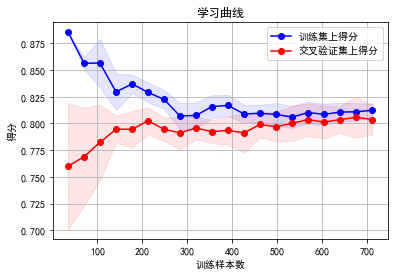

(0.8041289762608517, 0.028972978630723678)

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve 得到training_score和cv_scoer,使用matplotlib画出learning curve
def plot_learing_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=1, train_size=np.linspace(.05,1.,20),verbose=0,plot=True):
    
    '''
    画出data在某模型上的learning curve.
    参数解释
    --------
    estimator:使用的分类器
    title:表格的标题
    X:输入的feature,numpy类型
    y：输入的target vactor
    ylim:tuple格式的(ymin,ymax),设定图像中纵坐标的最低点和最高点
    cv:做cross-validation的时候，数据分成的份数
    n_jobs:并行的任务数(默认1)
    '''
    train_sizes,train_scores,test_scores = learning_curve(
        estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_size,verbose=verbose)
    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        # 反转y轴
        plt.gca().invert_yaxis() # gca()对坐标轴进行一些简单处理
        plt.grid() # 生成网格
        
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learing_curve(clf, u"学习曲线", X, y)

目前的曲线来看，我们的model并不处于overfitting的状态，(overfintting的表现一般是训练集上得分高，而交叉验证集上要低很多，中间的gap比较大)。因此我们可以再做一些feature engineering的工作，添加一些新产出的特征或组合特征到模型中。

## 模型融合(model ensemble)
机器学习/数据挖掘上通常最后会用到的大杀器了。嗯，模型融合。

* 【模型融合很重要】  
* 【模型融合很重要】  
* 【模型融合很重要】  

什么是模型融合呢?

大家都看过知识问答的综艺节目中，求助现场观众的时候，让观众投票，最高的答案作为自己的答案的形式吧，每个人都有一个判定结果，最后我们相信答案在大多数人手里。

最简单的模型融合大概就是这么个意思，比如分类问题，当我们手上有一堆在同一份数据集上训练得到的分类器(比如logistic  
regression,SVM,KNN,random forest,神经网络),那我们让它们都分别去做判定，然后对结果做投票统计，取票数最多的结果为最后结果。

bingo.问题就这么完美的解决了。

话说回来，回到现在的问题，你看，现在只讲了logistic regression。如果还想用这个融合思想取提高结果，应该怎么做呢？

既然这个时候模型没得选，在数据上动动手脚。如果模型出现过拟合，一定是在训练上出现拟合度过度造成的对吧。

干脆就不要用全部的训练集，每次取训练集的一个subset，做训练，这样，我们虽然用的是同一个机器学习算法但是得到的模型却是不一样的；同时  
因为我们没有任何一份子数据集是全的，因此即使粗线过拟合，也是在子训练集上，而不是全体数据上，这样做一个融合，

可能对最后的结果有一个帮助。对，这就是常用的Bagging


In [167]:
from sklearn.ensemble import BaggingRegressor
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')

#y即Survived结果
y = train_df.iloc[:,0]

#X即特征属性值
X = train_df.iloc[:,1:]

#fir到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=1.0,penalty='l1',solver="liblinear",tol=1e-6)
bagging_clf = BaggingRegressor(clf,n_estimators=20,max_samples=0.8,max_features=1.0,bootstrap=True,bootstrap_features=False,n_jobs=-1)
bagging_clf.fit(X,y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'],'Survived':predictions})
result.to_csv("titanic/logistic_regression_bagging_predictions.csv",index=False)